In [1]:
import subprocess
import time

def run_once(parser, *, iter_num=10000000, expr='2+2*x'):
    start_time = time.monotonic()
    subprocess.run(['./main', '-p', parser, '-n', str(iter_num), '-x', '4', expr])
    end_time = time.monotonic()
    return (end_time - start_time) / iter_num

In [2]:
dp = {}
for parser in ['compute', 'ast_rec', 'ast_iter', 'gccjit']:
    dp[parser] = d = []
    for expr_len in range(1, 25):
        d.append({'time': run_once(parser, expr='+'.join(['2'] * expr_len)), 'expr_len': expr_len})

In [3]:
import pandas
df = pandas.concat({parser: pandas.io.json.json_normalize(d) for parser, d in dp.items()})
df.reset_index(level=0, inplace=True)
df.rename(columns={'level_0': 'parser'}, inplace=True)

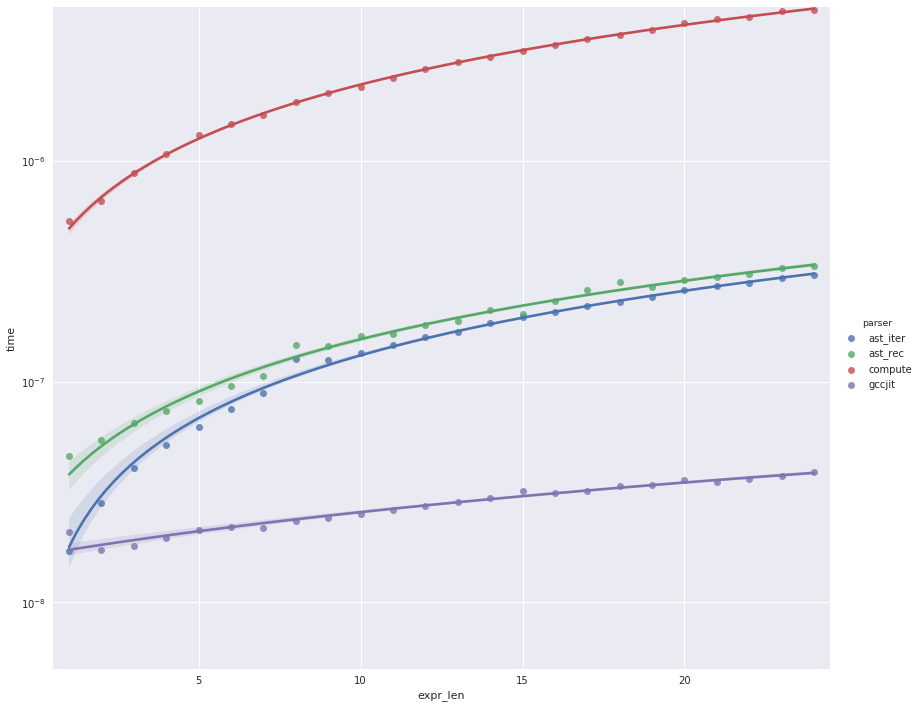

In [8]:
import seaborn
from matplotlib import pyplot
import numpy

seaborn.lmplot(x='expr_len', y='time', hue="parser", data=df, truncate=True, size=10, aspect=1.2)
pyplot.xlim(0.5, 24.5)
pyplot.ylim(5e-9, 5e-6)
pyplot.grid(True)
pyplot.yscale("log")
    
pyplot.show()